### This is an implementation of the Gale-Shapley algorithm for the stable marriage problem

In [16]:
import numpy as np
import random
from itertools import permutations,product
import matplotlib.pyplot as plt

In [17]:
def reverse(preferences):
    n= len(preferences)
    return [preferences.index(i) for i in range(n)]

In [19]:
def gale_shapley(p_prefs, d_prefs):## This function takes the matrix preferences of the proponents and disponents.
    ## it returns a list d_partners whose i-th component is the partner of the i-th disponent
    n = len(p_prefs)
    d_partner = [-1] * n
    p_free = [True] * n
    free_count = n
    proposals=[[]]
    relationships=[[]]

    while free_count:
        m = p_free.index(True)
        for w in p_prefs[m]:
            if d_partner[w] == -1:
                d_partner[w] = m
                p_free[m] = False
                free_count -= 1
                proposals.append([(m,w)])
                proposals.append([])
                relationships.append(relationships[-1])
                relationships.append(relationships[-1]+[(m,w)])
                break
            else:
                m1 = d_partner[w]
                w_list = d_prefs[w]
                if w_list.index(m) < w_list.index(m1):
                    d_partner[w] = m
                    p_free[m] = False
                    p_free[m1] = True
                    proposals.append([(m,w)])
                    proposals.append([])
                    relationships.append(relationships[-1])
                    new_rel=relationships[-1]+[(m,w)]
                    new_rel.remove((m1,w))
                    relationships.append(new_rel)
                    break
                else:
                    proposals.append([(m,w)])
                    proposals.append([])
                    relationships.append(relationships[-1])
                    relationships.append(relationships[-1])

    return {"disponents_partners":d_partner,"proposals":proposals,"relationships":relationships}

## Random Example

In [21]:
k=10
men_pref=[]
women_pref=[]
for i in range(k):

    a=list(np.random.permutation(list(range(k))))
    #a=list(range(k))
    b=list(np.random.permutation(list(range(k))))
    men_pref.append(a)
    women_pref.append(b)

ans=gale_shapley(men_pref,women_pref)






In [22]:
rel=ans["relationships"]
pro=ans["proposals"]
final=ans["disponents_partners"]

In [23]:
result=sorted(rel[-1], key=lambda x: x[1])

In [24]:
result

[(9, 0),
 (5, 1),
 (6, 2),
 (0, 3),
 (8, 4),
 (7, 5),
 (3, 6),
 (1, 7),
 (2, 8),
 (4, 9)]

In [25]:
# this creates and instance of preferences
def make_preferences(n):
    ans=[]
    for i in range(n):
        ans.append(list(np.random.permutation(list(range(n)))))
    return ans

In [26]:
# This creates an instance of the problem and computes the solution
def make_instance(m):
    men_preferences = make_preferences(m)
    women_preferences = make_preferences(m)

    women_engagements = gale_shapley(men_preferences, women_preferences)["disponents_partners"]
    men_engagements=reverse(women_engagements)

    return men_preferences,women_preferences,men_engagements,women_engagements,

In [28]:
### This checks that a marriage is stable
def check_stable(men_pref,women_pref,men_eng,women_eng):
    n=len(men_pref)
    ans="Stable"
    for i in range(n):
        if ans=="Unstable":
            break
        for j in range(men_pref[i].index(men_eng[i])):
            woman_pref=women_pref[men_pref[i][j]]
            if woman_pref.index(i)<woman_pref.index(women_eng[men_pref[i][j]]):
                ans="Unstable"
                # print(men_pref[i])
                # print(women_pref[men_pref[i][j]])
                # print(men_eng)
                # print(women_eng)
                break
    return ans
    



## This is an experiment to check that check stable works well

In [29]:
k=5
res=[]
for i in range(1000):
    
    men_pref=[]
    women_pref=[]
    for i in range(k):
        men_pref=make_preferences(k)
        women_pref=make_preferences(k)

    ans=gale_shapley(men_pref,women_pref)
    a=ans["disponents_partners"]
    b=reverse(a)
    
    x=list(range(k))
    random.shuffle(x)
    y=reverse(x)
    T=check_stable(men_pref,women_pref,b,a)
    F=check_stable(men_pref,women_pref,x,y)
    res.append((T,F))




## This function finds all stable marriages given preference matrix

In [30]:
def find_all_stable_marriages(k):   
    men_pref=make_preferences(k)
    women_pref=make_preferences(k)

    stable_marriages=[]
    # Example list
    numbers=list(range(k))

    # Generate all permutations of the list
    possibilities = list(permutations(numbers))
    for possibility in possibilities:
        if check_stable(men_pref,women_pref,reverse(possibility),possibility)=="Stable":
            #print(possibility)
            stable_marriages.append(possibility)
    return {"men_pref":men_pref,"women_pref":women_pref,"stable_marriages":stable_marriages}


### Find an example whith many stable marriages

In [245]:
k=8
examples=[]
for i in range(500):
    examples.append(find_all_stable_marriages(k))

In [246]:
example=sorted(examples, key=lambda dictionary: len(dictionary["stable_marriages"]))[-1]

In [247]:
example

{'men_pref': [[0, 1, 4, 7, 6, 3, 2, 5],
  [1, 0, 4, 3, 2, 6, 5, 7],
  [5, 2, 6, 3, 7, 4, 0, 1],
  [2, 5, 3, 6, 0, 7, 1, 4],
  [7, 3, 0, 5, 6, 2, 1, 4],
  [3, 1, 5, 6, 7, 4, 0, 2],
  [4, 6, 5, 2, 0, 3, 1, 7],
  [6, 1, 7, 2, 5, 0, 3, 4]],
 'women_pref': [[3, 2, 1, 4, 7, 5, 0, 6],
  [5, 2, 0, 1, 4, 3, 7, 6],
  [5, 7, 3, 4, 2, 1, 0, 6],
  [6, 0, 1, 7, 3, 4, 5, 2],
  [3, 2, 7, 6, 4, 5, 1, 0],
  [3, 1, 7, 0, 6, 4, 2, 5],
  [6, 2, 4, 7, 0, 5, 3, 1],
  [0, 4, 6, 5, 7, 3, 1, 2]],
 'stable_marriages': [(0, 1, 3, 5, 6, 2, 7, 4),
  (0, 1, 7, 5, 2, 3, 6, 4),
  (0, 1, 7, 5, 6, 3, 2, 4),
  (1, 0, 3, 5, 6, 2, 7, 4),
  (1, 0, 7, 5, 2, 3, 6, 4),
  (1, 0, 7, 5, 6, 3, 2, 4),
  (1, 5, 3, 4, 6, 2, 7, 0),
  (1, 5, 7, 4, 2, 3, 6, 0),
  (1, 5, 7, 4, 6, 3, 2, 0)]}

### This is the example I use in Explora

In [32]:
good={'men_pref': [[2, 4, 6, 7, 0, 3, 5, 1],
  [0, 2, 4, 6, 7, 3, 1, 5],
  [5, 2, 1, 0, 4, 7, 3, 6],
  [6, 1, 4, 5, 0, 7, 3, 2],
  [4, 2, 6, 1, 0, 7, 3, 5],
  [3, 6, 2, 1, 5, 4, 7, 0],
  [1, 7, 2, 4, 0, 3, 6, 5],
  [6, 7, 5, 0, 2, 4, 3, 1]],
 'women_pref': [[4, 0, 1, 5, 7, 2, 6, 3],
  [1, 3, 6, 5, 4, 0, 7, 2],
  [0, 1, 7, 4, 2, 5, 6, 3],
  [4, 1, 2, 3, 5, 7, 0, 6],
  [1, 0, 4, 2, 6, 5, 7, 3],
  [0, 7, 2, 5, 6, 4, 1, 3],
  [6, 3, 4, 5, 2, 1, 7, 0],
  [2, 1, 7, 4, 0, 3, 6, 5]],
 'stable_marriages': [(1, 3, 0, 5, 4, 2, 6, 7),
  (1, 3, 0, 5, 4, 7, 6, 2),
  (1, 6, 0, 5, 4, 2, 3, 7),
  (1, 6, 0, 5, 4, 7, 3, 2),
  (4, 3, 0, 5, 1, 2, 6, 7),
  (4, 3, 0, 5, 1, 7, 6, 2),
  (4, 6, 0, 5, 1, 2, 3, 7),
  (4, 6, 0, 5, 1, 7, 3, 2)]}

In [33]:
men_pref=good["men_pref"]
women_pref=good["women_pref"]
sm=good["stable_marriages"]

## Check that marriages are stable

In [34]:
answers=[]
for a in sm:
    answers.append(check_stable(men_pref,women_pref,reverse(a),a))

In [35]:
len(answers)

8

### Compute sadness vector

In [36]:
def sadness_vectors(men_pref,women_pref,women_eng):

    a=women_eng
    b=reverse(a)
    n=len(a)
    women_sadness=[ women_pref[i].index(a[i])for i in range(n)]
    men_sadness=[men_pref[i].index(b[i])for i in range(n)]
    return {"men_sadness":men_sadness,"women_sadness":women_sadness}

In [37]:
k=3
print("men_pref",men_pref)
print("women_pref",women_pref)
print("women_eng",sm[k])
print("men_eng",reverse(sm[k]))

men_pref [[2, 4, 6, 7, 0, 3, 5, 1], [0, 2, 4, 6, 7, 3, 1, 5], [5, 2, 1, 0, 4, 7, 3, 6], [6, 1, 4, 5, 0, 7, 3, 2], [4, 2, 6, 1, 0, 7, 3, 5], [3, 6, 2, 1, 5, 4, 7, 0], [1, 7, 2, 4, 0, 3, 6, 5], [6, 7, 5, 0, 2, 4, 3, 1]]
women_pref [[4, 0, 1, 5, 7, 2, 6, 3], [1, 3, 6, 5, 4, 0, 7, 2], [0, 1, 7, 4, 2, 5, 6, 3], [4, 1, 2, 3, 5, 7, 0, 6], [1, 0, 4, 2, 6, 5, 7, 3], [0, 7, 2, 5, 6, 4, 1, 3], [6, 3, 4, 5, 2, 1, 7, 0], [2, 1, 7, 4, 0, 3, 6, 5]]
women_eng (1, 6, 0, 5, 4, 7, 3, 2)
men_eng [2, 0, 7, 6, 4, 3, 1, 5]


In [39]:
sadness=sadness_vectors(men_pref,women_pref,sm[0])
sadness

{'men_sadness': [0, 0, 0, 1, 0, 0, 6, 1],
 'women_sadness': [2, 1, 0, 4, 2, 2, 0, 2]}

In [20]:
men_sadness,women_sadnes=sadness["men_sadness"],sadness["women_sadness"]

In [21]:
men_sadness

[0, 0, 0, 1, 0, 0, 6, 1]

## Sort marriages by women sadness

In [40]:
def sort_by_women_sadness(marriages):
    return sorted(marriages, key=lambda x: sum(sadness_vectors(men_pref,women_pref,x)["women_sadness"]))  # Sort based on the second element of each tuple


In [42]:
sm_by_ws=sort_by_women_sadness(sm)
sm_by_ws

[(4, 3, 0, 5, 1, 7, 6, 2),
 (4, 6, 0, 5, 1, 7, 3, 2),
 (4, 3, 0, 5, 1, 2, 6, 7),
 (1, 3, 0, 5, 4, 7, 6, 2),
 (4, 6, 0, 5, 1, 2, 3, 7),
 (1, 6, 0, 5, 4, 7, 3, 2),
 (1, 3, 0, 5, 4, 2, 6, 7),
 (1, 6, 0, 5, 4, 2, 3, 7)]

In [43]:
sm

[(1, 3, 0, 5, 4, 2, 6, 7),
 (1, 3, 0, 5, 4, 7, 6, 2),
 (1, 6, 0, 5, 4, 2, 3, 7),
 (1, 6, 0, 5, 4, 7, 3, 2),
 (4, 3, 0, 5, 1, 2, 6, 7),
 (4, 3, 0, 5, 1, 7, 6, 2),
 (4, 6, 0, 5, 1, 2, 3, 7),
 (4, 6, 0, 5, 1, 7, 3, 2)]

In [44]:
sm_by_ws

[(4, 3, 0, 5, 1, 7, 6, 2),
 (4, 6, 0, 5, 1, 7, 3, 2),
 (4, 3, 0, 5, 1, 2, 6, 7),
 (1, 3, 0, 5, 4, 7, 6, 2),
 (4, 6, 0, 5, 1, 2, 3, 7),
 (1, 6, 0, 5, 4, 7, 3, 2),
 (1, 3, 0, 5, 4, 2, 6, 7),
 (1, 6, 0, 5, 4, 2, 3, 7)]

In [34]:
gale_shapley(men_pref,women_pref)["disponents_partners"]

[1, 6, 0, 5, 4, 2, 3, 7]

## Sort marriages by men sadness

In [35]:

def sort_by_men_sadness(marriages):
    return sorted(marriages, key=lambda x: sum(sadness_vectors(men_pref,women_pref,x)["men_sadness"]))  # Sort based on the second element of each tuple

In [41]:
sm_by_men_sadness=sort_by_men_sadness(sm)
sm_by_men_sadness

[(1, 6, 0, 5, 4, 2, 3, 7),
 (1, 6, 0, 5, 4, 7, 3, 2),
 (4, 6, 0, 5, 1, 2, 3, 7),
 (1, 3, 0, 5, 4, 2, 6, 7),
 (4, 6, 0, 5, 1, 7, 3, 2),
 (1, 3, 0, 5, 4, 7, 6, 2),
 (4, 3, 0, 5, 1, 2, 6, 7),
 (4, 3, 0, 5, 1, 7, 6, 2)]

## Sort by average sadness

In [43]:

def sort_by_average_sadness(marriages):
    return sorted(marriages, key=lambda x: sum(sadness_vectors(men_pref,women_pref,x)["men_sadness"])+sum(sadness_vectors(men_pref,women_pref,x)["women_sadness"]))  # Sort based on the second element of each tuple

In [44]:
sm_by_avg=sort_by_average_sadness(sm)
sm_by_avg

[(1, 6, 0, 5, 4, 2, 3, 7),
 (4, 6, 0, 5, 1, 2, 3, 7),
 (1, 6, 0, 5, 4, 7, 3, 2),
 (1, 3, 0, 5, 4, 2, 6, 7),
 (4, 6, 0, 5, 1, 7, 3, 2),
 (4, 3, 0, 5, 1, 2, 6, 7),
 (1, 3, 0, 5, 4, 7, 6, 2),
 (4, 3, 0, 5, 1, 7, 6, 2)]

In [45]:
gale_shapley(men_pref,women_pref)["disponents_partners"]

[1, 6, 0, 5, 4, 2, 3, 7]

## Sort by maximal sadness

In [46]:

def sort_by_maximal_sadness(marriages):
    return sorted(marriages, key=lambda x: sorted(sadness_vectors(men_pref,women_pref,x)["men_sadness"]+sadness_vectors(men_pref,women_pref,x)["women_sadness"],reverse=True))

In [47]:
sm_by_max=sort_by_maximal_sadness(sm)
sm_by_max

[(1, 6, 0, 5, 4, 2, 3, 7),
 (4, 6, 0, 5, 1, 2, 3, 7),
 (1, 6, 0, 5, 4, 7, 3, 2),
 (4, 6, 0, 5, 1, 7, 3, 2),
 (1, 3, 0, 5, 4, 2, 6, 7),
 (4, 3, 0, 5, 1, 2, 6, 7),
 (1, 3, 0, 5, 4, 7, 6, 2),
 (4, 3, 0, 5, 1, 7, 6, 2)]

In [48]:
for item in sm_by_max:
    x=sadness_vectors(men_pref,women_pref,item)
    
    print(x,sorted(x["women_sadness"]+x["men_sadness"],reverse=True))

{'men_sadness': [0, 0, 0, 0, 0, 0, 0, 1], 'women_sadness': [2, 2, 0, 4, 2, 2, 1, 2]} [4, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
{'men_sadness': [0, 2, 0, 0, 4, 0, 0, 1], 'women_sadness': [0, 2, 0, 4, 0, 2, 1, 2]} [4, 4, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
{'men_sadness': [0, 0, 5, 0, 0, 0, 0, 2], 'women_sadness': [2, 2, 0, 4, 2, 1, 1, 0]} [5, 4, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
{'men_sadness': [0, 2, 5, 0, 4, 0, 0, 2], 'women_sadness': [0, 2, 0, 4, 0, 1, 1, 0]} [5, 4, 4, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
{'men_sadness': [0, 0, 0, 1, 0, 0, 6, 1], 'women_sadness': [2, 1, 0, 4, 2, 2, 0, 2]} [6, 4, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
{'men_sadness': [0, 2, 0, 1, 4, 0, 6, 1], 'women_sadness': [0, 1, 0, 4, 0, 2, 0, 2]} [6, 4, 4, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
{'men_sadness': [0, 0, 5, 1, 0, 0, 6, 2], 'women_sadness': [2, 1, 0, 4, 2, 1, 0, 0]} [6, 5, 4, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
{'men_sadness': [0, 2, 5, 1, 4, 0, 6, 2], 'women_sadness': [0,

In [49]:
print(sm_by_men_sadness)
print(sm_by_women_sadness[::-1])

[(1, 6, 0, 5, 4, 2, 3, 7), (1, 6, 0, 5, 4, 7, 3, 2), (4, 6, 0, 5, 1, 2, 3, 7), (1, 3, 0, 5, 4, 2, 6, 7), (4, 6, 0, 5, 1, 7, 3, 2), (1, 3, 0, 5, 4, 7, 6, 2), (4, 3, 0, 5, 1, 2, 6, 7), (4, 3, 0, 5, 1, 7, 6, 2)]
[(1, 6, 0, 5, 4, 2, 3, 7), (1, 3, 0, 5, 4, 2, 6, 7), (1, 6, 0, 5, 4, 7, 3, 2), (4, 6, 0, 5, 1, 2, 3, 7), (1, 3, 0, 5, 4, 7, 6, 2), (4, 3, 0, 5, 1, 2, 6, 7), (4, 6, 0, 5, 1, 7, 3, 2), (4, 3, 0, 5, 1, 7, 6, 2)]


In [50]:
sm_by_avg==sm_by_max

False

### Create order 

In [45]:
def women_rather(x:list,y:list):### Takes two marriages x and y and returns whether or not women prefere x over y
    n=len(x)
    ans=True
    sadness_X=sadness_vectors(men_pref,women_pref,x)
    sadness_Y=sadness_vectors(men_pref,women_pref,y)
    for i in range(n):
        if sadness_X["women_sadness"][i]> sadness_Y["women_sadness"][i]:
            ans=False
            break
    return ans



In [48]:
M=[]
for marriage in sm_by_ws:
    M.append([women_rather(marriage,item) for item in sm_by_ws])
M
        

[[True, True, True, True, True, True, True, True],
 [False, True, False, False, True, True, False, True],
 [False, False, True, False, True, False, True, True],
 [False, False, False, True, False, True, True, True],
 [False, False, False, False, True, False, False, True],
 [False, False, False, False, False, True, False, True],
 [False, False, False, False, False, False, True, True],
 [False, False, False, False, False, False, False, True]]

In [49]:
def men_rather(x:list,y:list):### Takes two marriages x and y and returns whether or not women prefere x over y
    n=len(x)
    ans=True
    sadness_X=sadness_vectors(men_pref,women_pref,x)
    sadness_Y=sadness_vectors(men_pref,women_pref,y)
    for i in range(n):
        if sadness_X["men_sadness"][i]> sadness_Y["men_sadness"][i]:
            ans=False
            break
    return ans

## Check that the two relationships define the same order

In [53]:
pairs_according_to_women={(A,B) for (A,B) in product(sm,sm) if women_rather(A,B)}
pairs_according_to_men={(B,A) for (A,B) in product(sm,sm) if men_rather(A,B)}

In [54]:
pairs_according_to_men==pairs_according_to_women

True

## The Join Operation (v)

In [55]:
def join(marriage_x,marriage_y):
    # The join operation takes two marriages and computes the join between them (the women choose the best of the two options)
    women_sadness_X=sadness_vectors(men_pref,women_pref,marriage_x)["women_sadness"]
    women_sadness_Y=sadness_vectors(men_pref,women_pref,marriage_y)["women_sadness"]
    ans=list(marriage_x)
    for i in range(len(marriage_x)):
        if women_sadness_X[i]>women_sadness_Y[i]:
            ans[i]=marriage_y[i]
    return tuple(ans)

In [56]:
count=[]
for (x,y) in product(sm,sm):
    if join(x,y) not in sm:
        count.append((x,y))
count
      

[]

## The Meet operation (^)

In [57]:
def meet(marriage_x,marriage_y):
    # The meet operation takes two marriages and computes the join between them (the men choose the best of the two options)
    men_sadness_X=sadness_vectors(men_pref,women_pref,marriage_x)["men_sadness"]
    men_sadness_Y=sadness_vectors(men_pref,women_pref,marriage_y)["men_sadness"]
    reversed_marriage_x=reverse(list(marriage_x))
    reversed_marriage_y=reverse(list(marriage_y))
    reversed_ans=reversed_marriage_x
    for i in range(len(marriage_x)):
        if men_sadness_X[i]>men_sadness_Y[i]:
            reversed_ans[i]=reversed_marriage_y[i]
    ans=tuple(reverse(reversed_ans))
    return ans

In [58]:
count=[]
for (x,y) in product(sm,sm):
    if meet(x,y) not in sm:
        count.append((x,y))
count

[]

## Check that X v (Y^Z)=(XvY)^(XvZ)

In [59]:
for x,y,z in product(sm,repeat=3):
    if join(x,meet(y,z))!=meet(join(x,y),join(x,z)):
        print("wtf")

## Check that X ^ (YvZ)=(X^Y)v(X^Z)

In [61]:
for x,y,z in product(sm,repeat=3):
    if meet(x,join(y,z))!=join(meet(x,y),meet(x,z)):
        print("wtf")

In [62]:
for x,y in product(sm,repeat=2):
    if not women_rather(join(x,y),x) or not women_rather(join(x,y),y) or not women_rather(x,meet(x,y)) or not women_rather(y,meet(x,y)):
        print("wtf")

### Plot Multiplication Tables

### Multiplication table

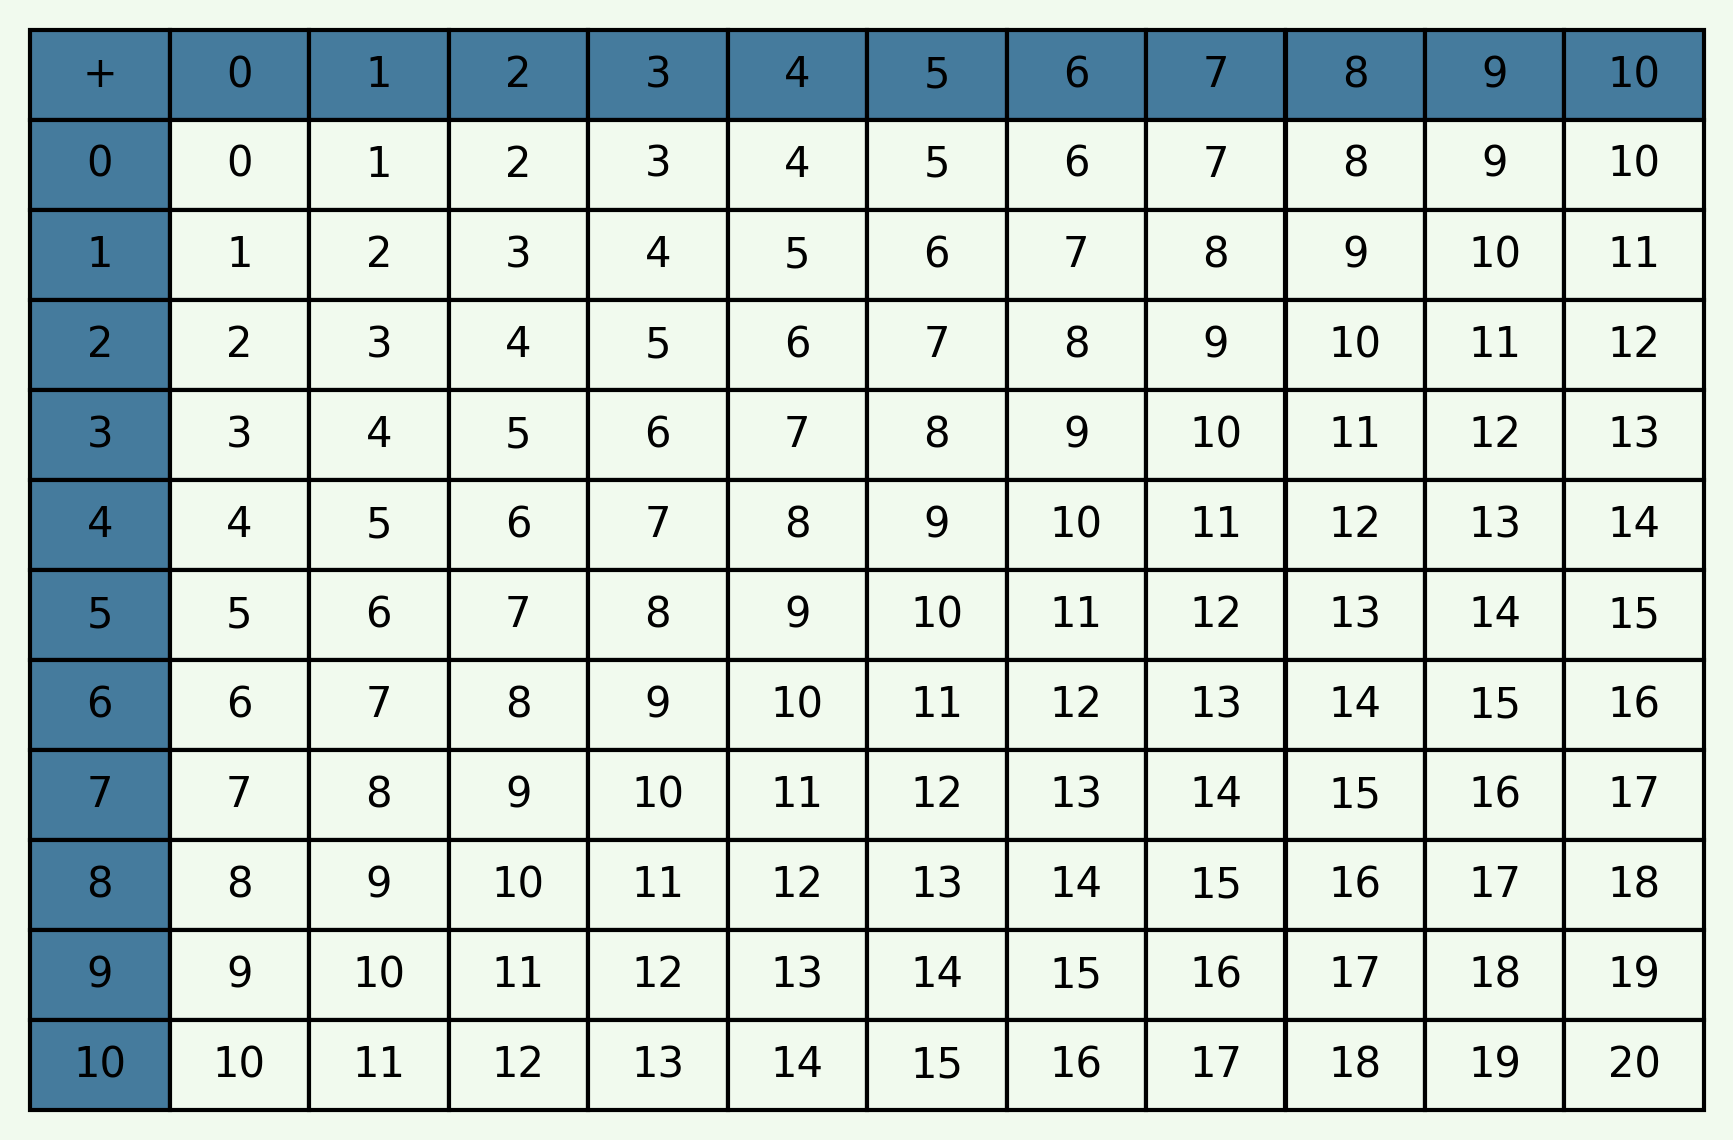

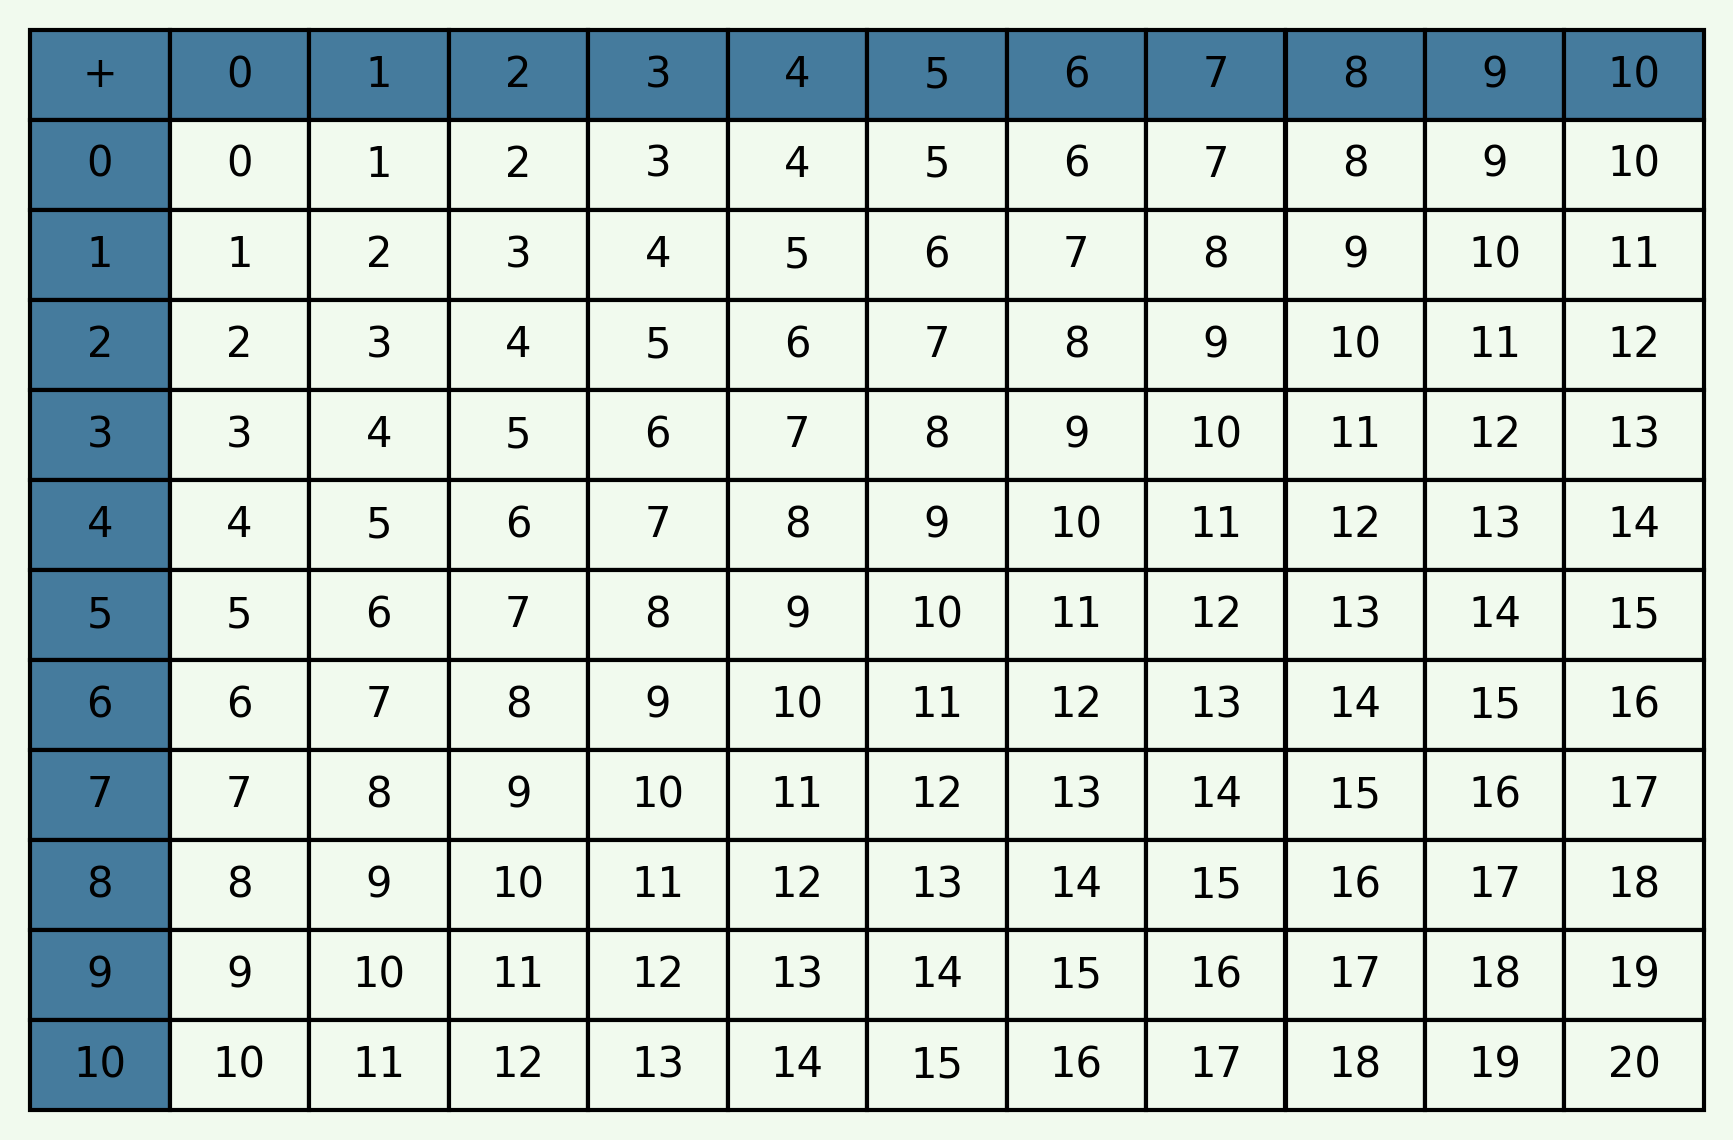

In [72]:
data=[["+"]+list(range(11))]
for i in range(11):
    data.append([i]+[i+j for j in range(11)])
make_table(data,"",yellow=False)

In [83]:
forward =dict()
backward=dict()
letters=["A","B","C","D","E","F","G","H"]
for i in range(8):
    forward[letters[i]]=sm_by_ws[i]
    backward[sm_by_ws[i]]=letters[i]

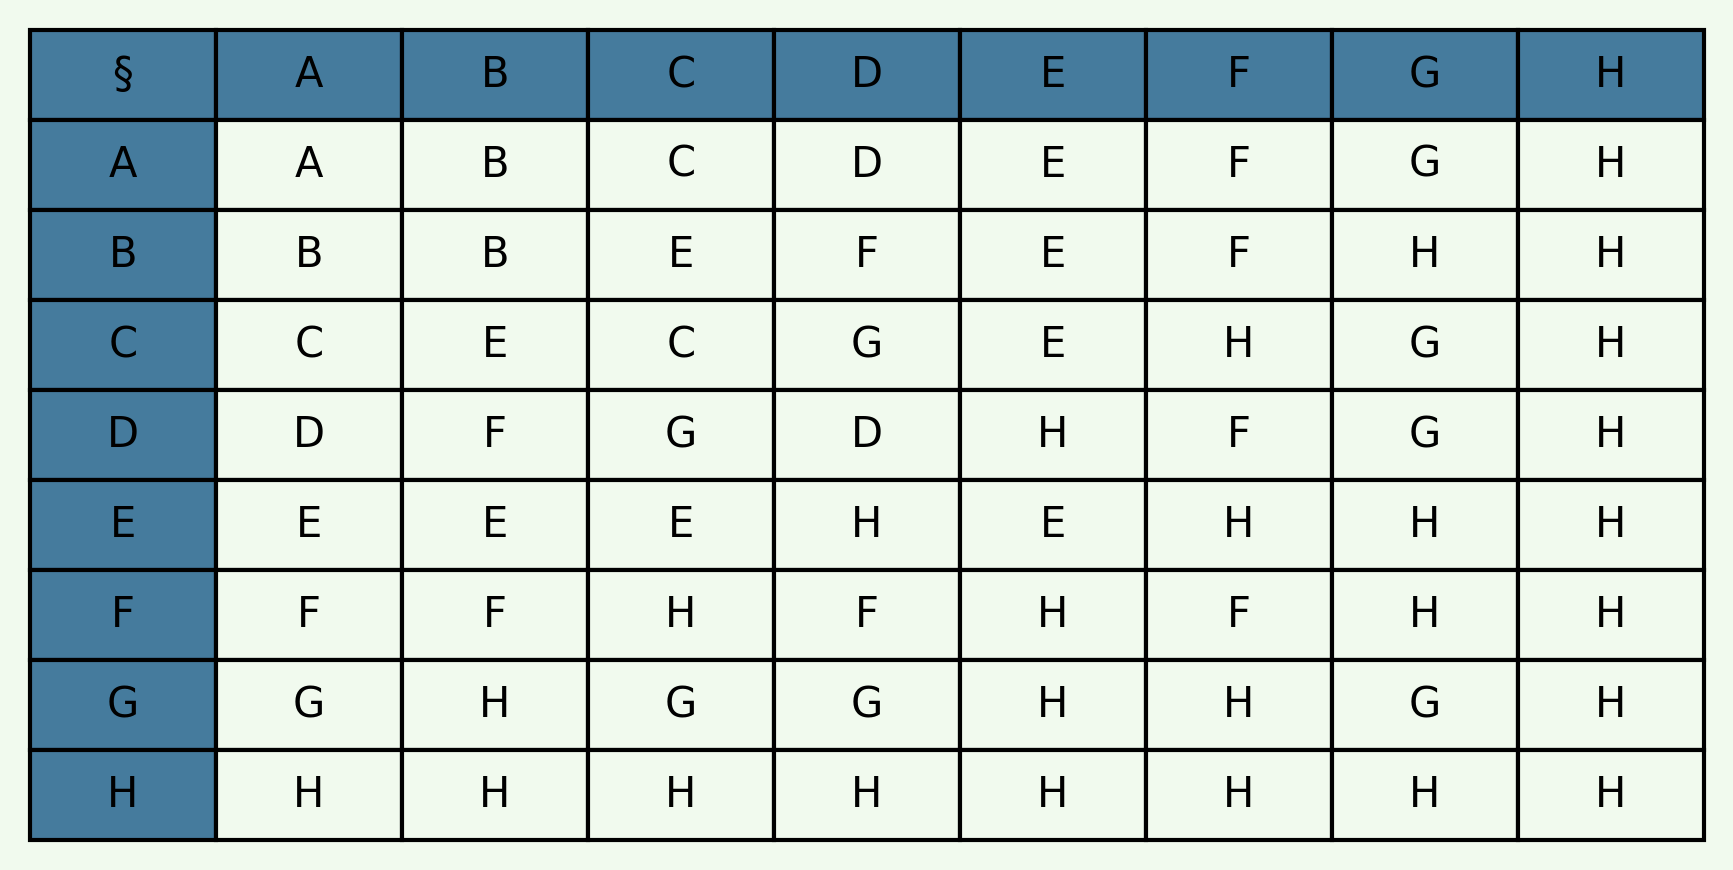

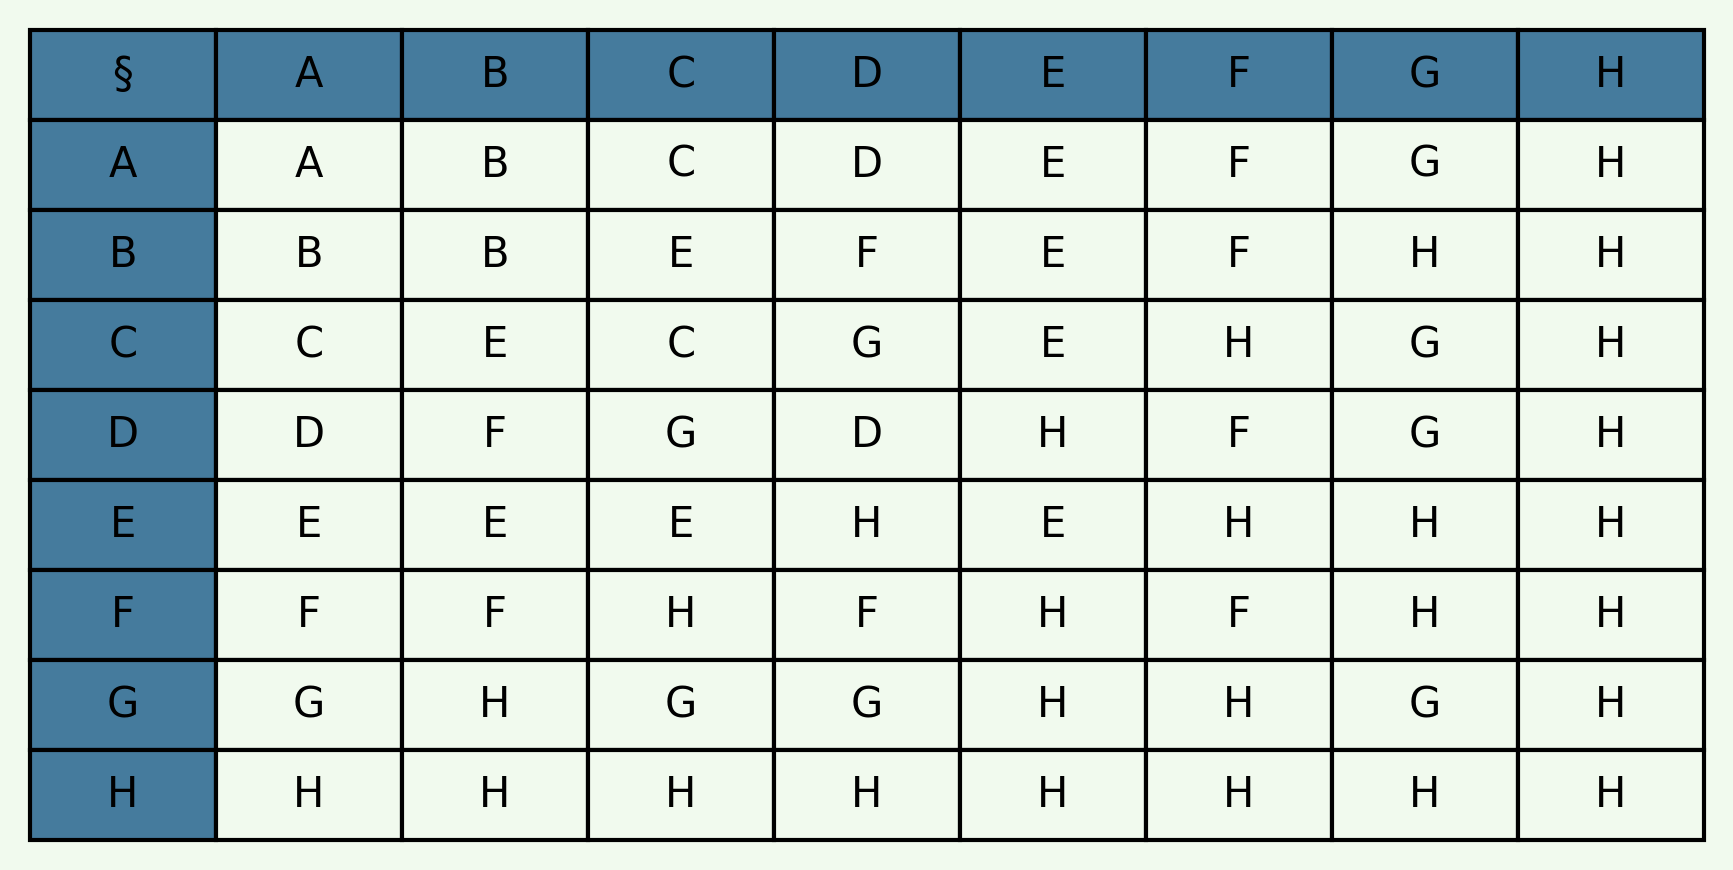

In [107]:
data=[[ "§"]+letters]
for letter in letters:
    data.append([letter]+[backward[meet(forward[letter],forward[item])]for item in letters])
make_table(data,"",yellow=False)

## ranking marriages

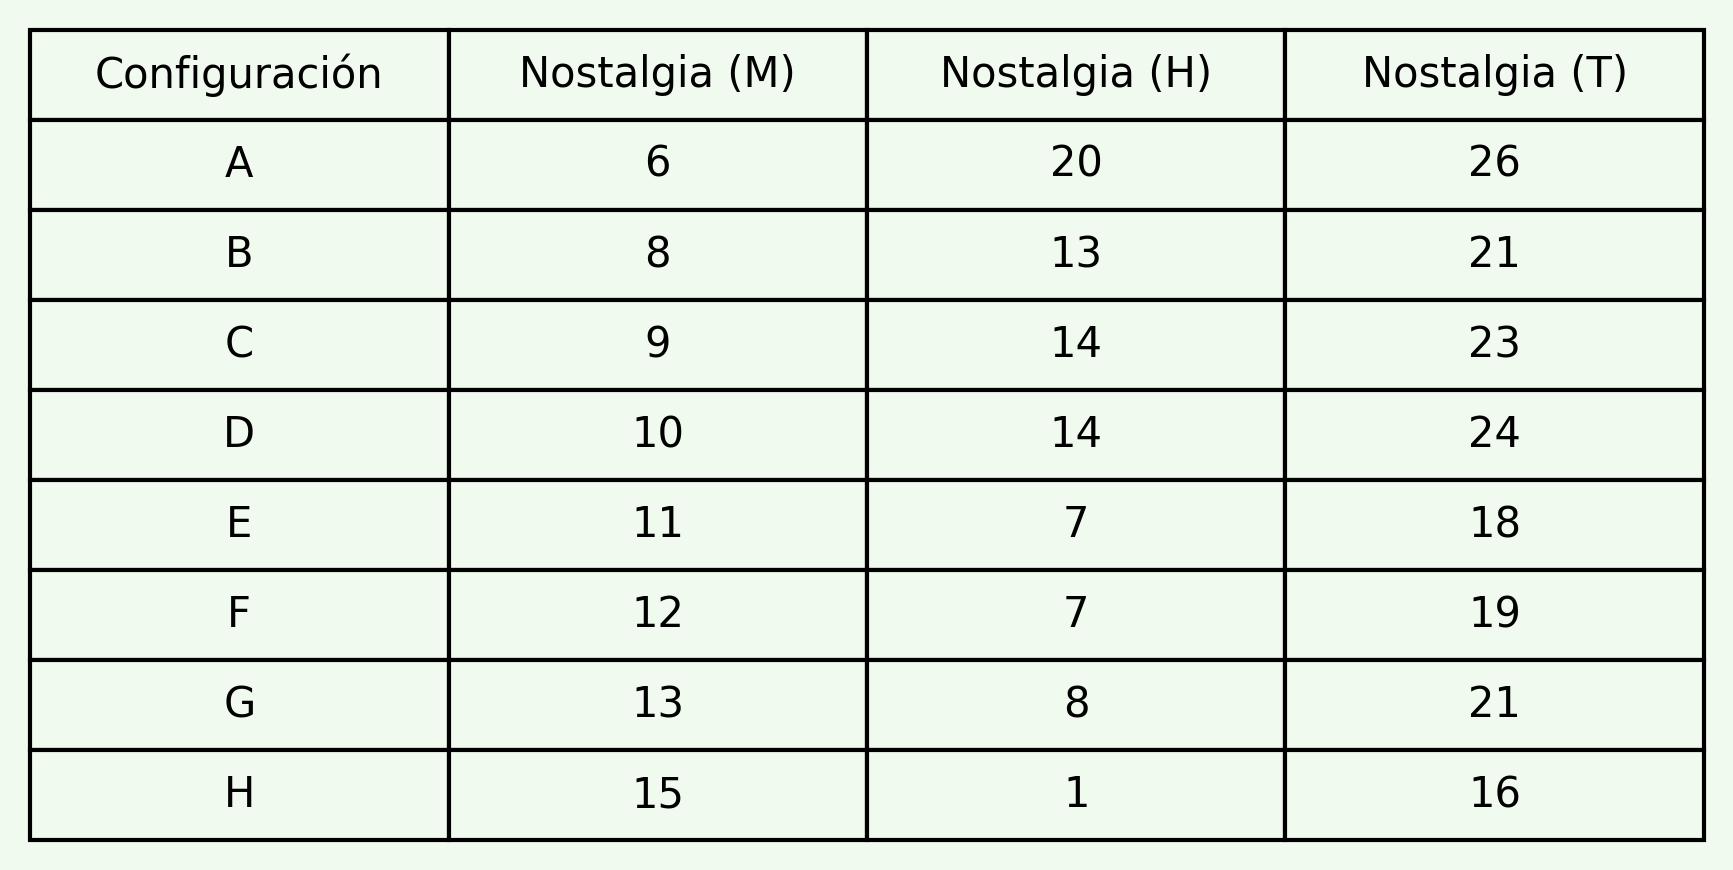

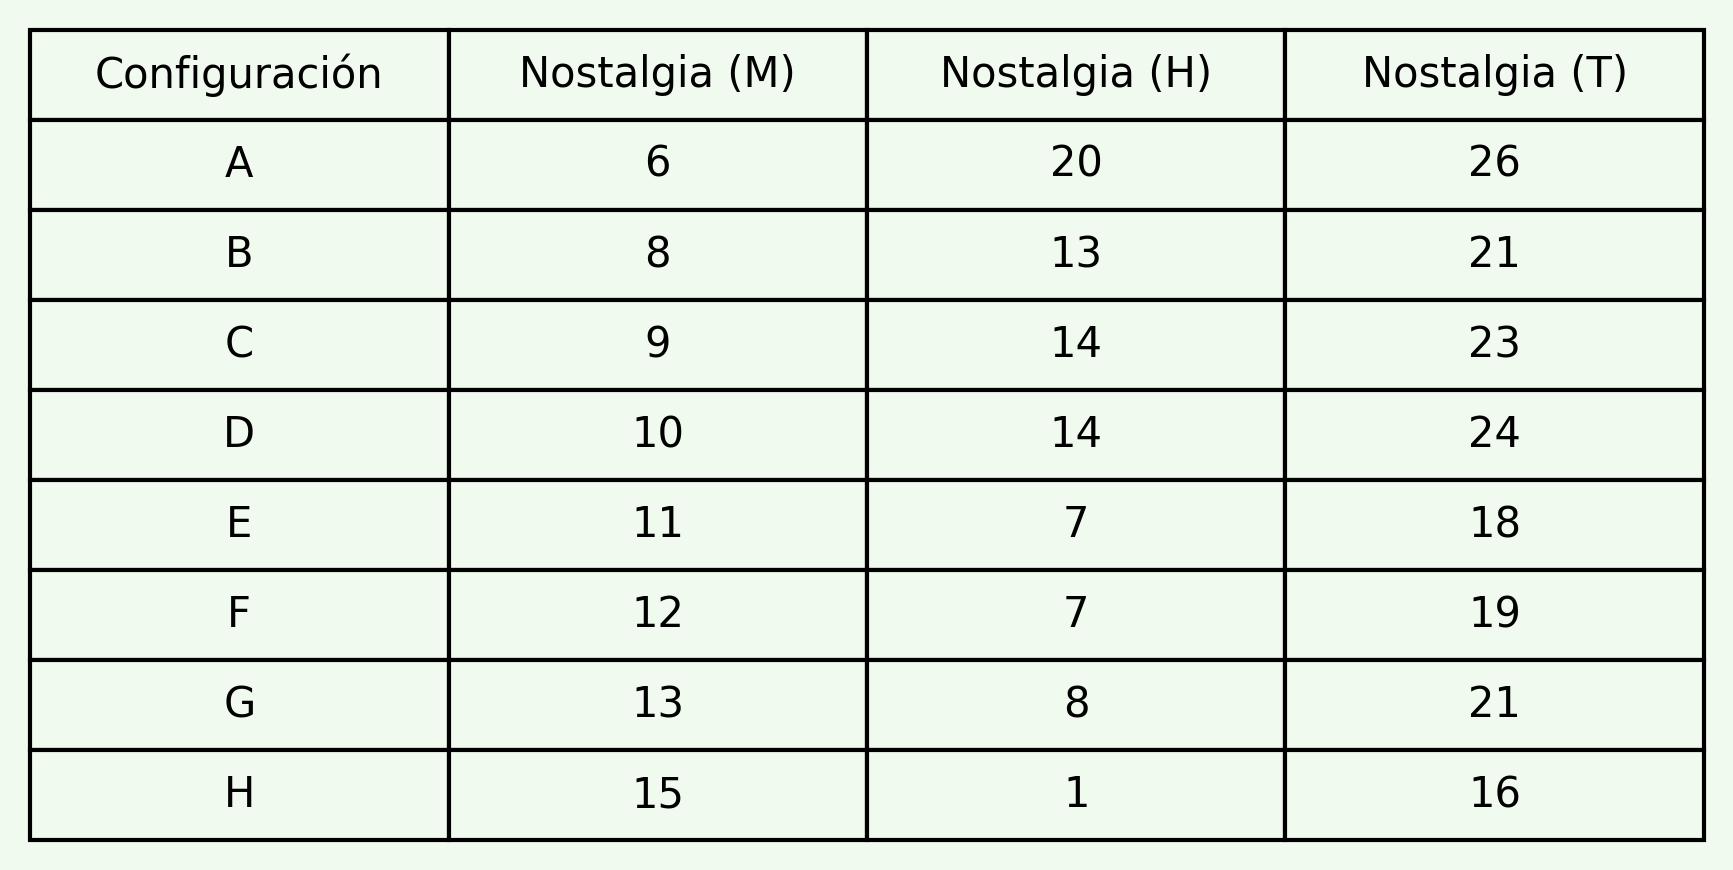

In [122]:
data=[["Configuración","Nostalgia (M)","Nostalgia (H)","Nostalgia (T)"]]
for conf in sm_by_ws:
    ans=sadness_vectors(men_pref,women_pref,conf)
    A=sum(ans["women_sadness"])
    B=sum(ans["men_sadness"])
    C=A+B
    data.append([backward[conf],A,B,C])
make_table(data,"")

## Check Birkoff's theorem

### Define the bijections

In [72]:

N=len(sm)
X=list(range(8))
reducibles=[tuple(gale_shapley(men_pref,women_pref)["disponents_partners"])]
for x,y in product(sm,sm):
    if not women_rather(x,y) and not women_rather(y,x):
        reducibles.append(join(x,y))
reducibles=[i for i in X if sm[i] in reducibles]
irreducibles=[i for i in X if i not in reducibles]
F=dict()
for marriage in sm:
    F[marriage]=tuple(sorted([x for x in irreducibles if women_rather(marriage,sm[x])]))
G=dict()
for item in list(F.keys()):
    G[F[item]]=item
SM=list(F.values())

In [73]:
SM

[(0,), (0, 3), (), (3,), (0, 6), (0, 3, 6), (6,), (3, 6)]

In [74]:
for item in sm:
    if G[F[item]]!=item:
        print("wtf")

In [75]:
for item in SM:
    if F[G[item]]!=item:
        print("wtf")

### Define the join and meet operations in SM

In [76]:
def MEET(tuple_x,tuple_y):
    return tuple(sorted([x for x in X if x in tuple_x and x in tuple_y]))
def JOIN(tuple_x,tuple_y):
    return tuple(sorted([x for x in X if x in tuple_x or x in tuple_y]))


### Check that F is an isomorphism

In [77]:
for x,y in product(sm,sm):
    if F[join(x,y)]!=JOIN(F[x],F[y]) or F[meet(x,y)]!=MEET(F[x],F[y]):
        print("wtf")
        

In [80]:
SM

[(0,), (0, 3), (), (3,), (0, 6), (0, 3, 6), (6,), (3, 6)]

In [84]:
import math
math.factorial(52)

80658175170943878571660636856403766975289505440883277824000000000000

In [85]:
14*(10**9)*365*24*3600

441504000000000000

In [6]:
from PIL import Image

In [63]:
paths=[path_1,path_2,path_3,path_4]
cropped_imgs=[]
for path in paths:
    a=str(i)
    file_path=prefix+path
    a=str(i)
    # Open the original image
    original_image = Image.open(file_path)

    # Define the area to crop (left, upper, right, lower)
    crop_area = (100, 800, 2800, 2200)  # Adjust these values to your needs

    # Crop the image
    cropped_image = original_image.crop(crop_area)
    cropped_imgs.append(cropped_image)

In [62]:
cropped_imgs[0].show()

### Make image of matrix of possibilities for alphabetical and  proponents

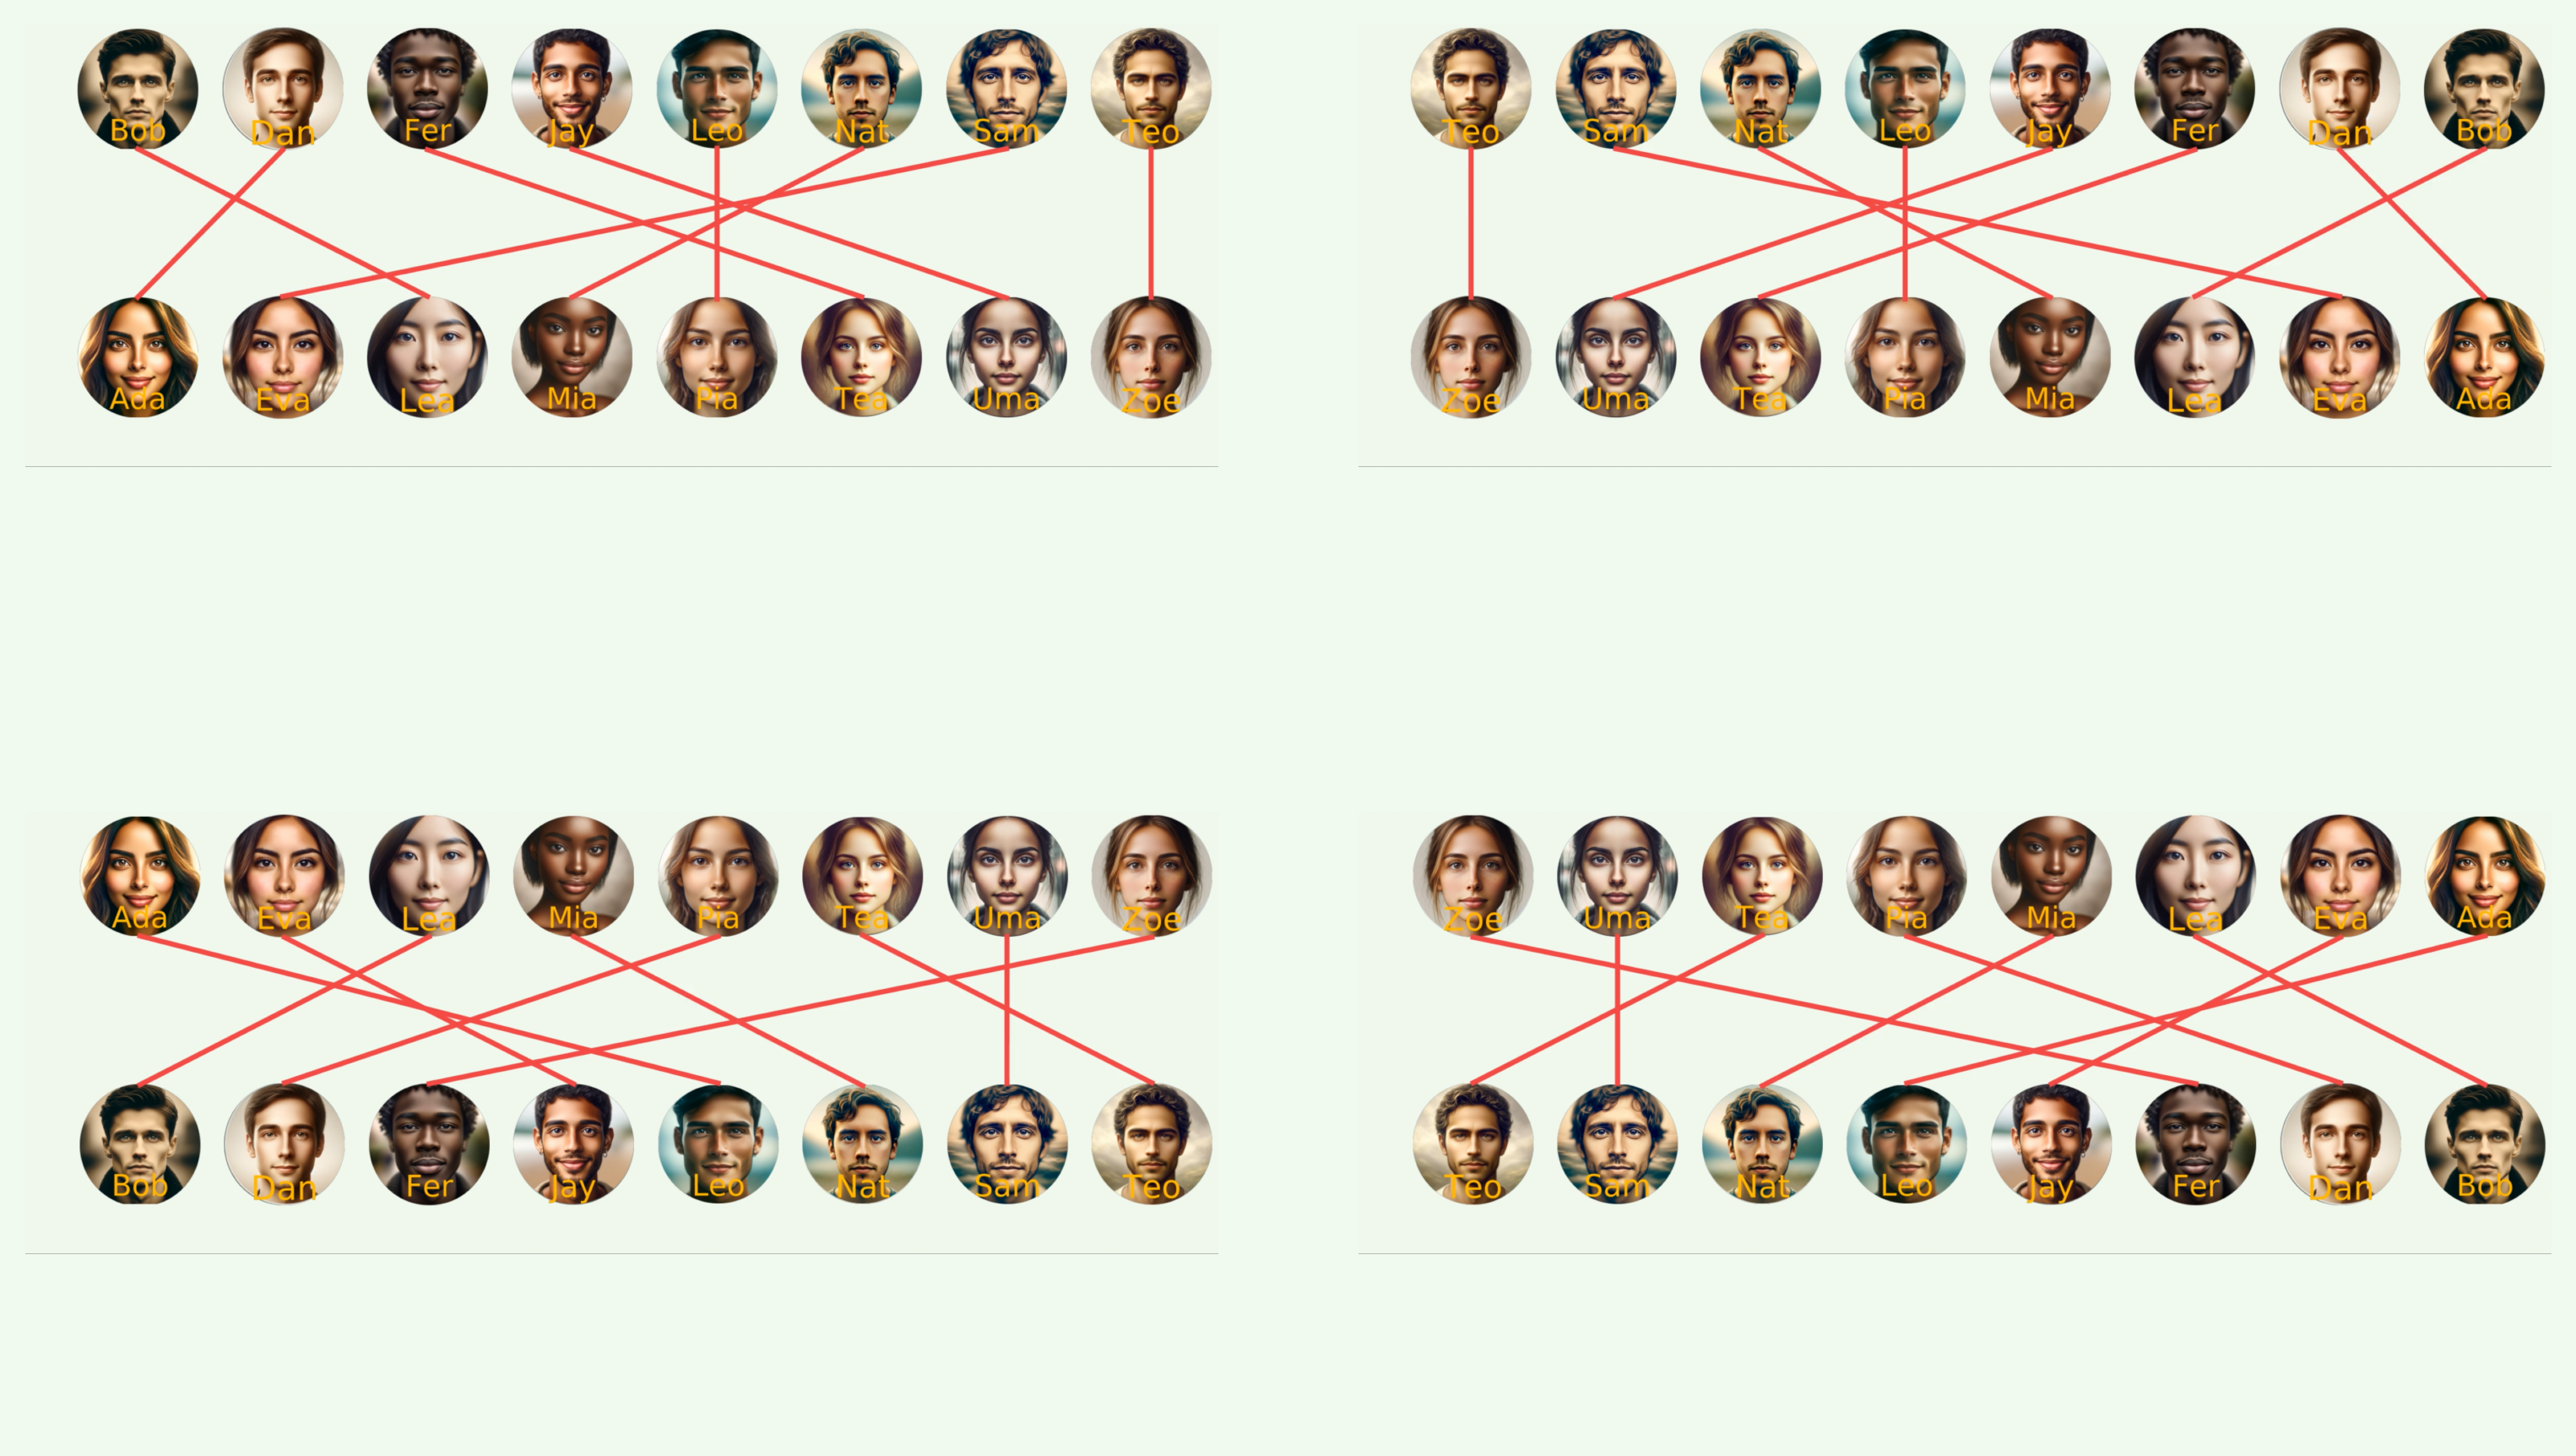

In [64]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

path_1="Images_Gale_Shapley/images_for_talk/si_hombres_proponen_orden.png"
path_2="Images_Gale_Shapley/images_for_talk/si_hombres_proponen_desorden.png"
path_3="Images_Gale_Shapley/images_for_talk/si_mujeres_proponen_orden.png"
path_4="Images_Gale_Shapley/images_for_talk/si_mujeres_proponen_desorden.png"
prefix="/Users/camiloariasabad/Desktop/Teaching/Topics_Algorithms_2023/Notebooks_for_Topics_on_Algorithms/Explora_Gale_Shapley/"
# Example matrix: None represents an image to be placed, otherwise, it's a string
matrix = [[0,1], [2, 3]]
#image_path = "/Users/camiloariasabad/Desktop/Teaching/Topics_Algorithms_2023/Notebooks_for_Topics_on_Algorithms/Explora_Gale_Shapley/Images_Gale_Shapley/Men/Bob.png"  # Path to your image

fig, axs = plt.subplots(nrows=2
                        , ncols=2, figsize=(10, 10),dpi=300)
fig.patch.set_facecolor('#F1FAEE')

for i, row in enumerate(matrix):
    for j, cell in enumerate(row):
        ax = axs[i, j]
        #img = imread(prefix+cell)  # Load your image
        if cell in range(4):
            ax.imshow(cropped_imgs[cell])
            ax.axis('off')  # Hide the axis
        else:
            ax.text(0.5, 0.5, cell, ha='center', va='center')
            ax.axis('off')  # Hide the axis
plt.tight_layout(pad=0.1, w_pad=4, h_pad=-15)
plt.show()

In [134]:
a=14000*10**6*365*24*3600

In [136]:
for i in range(7):
    if a < math.factorial(i)**(2*i):
        print(i)
        break

5
